In [1]:
# library vcd: Visualizing Categorical Data

## Arthritis, a dataset from Koch and Edwards (1988) 
## from a double-blind clinical trial investigating 
## a new treatment for rheumatoid arthritis.

In [2]:
## mosaic plot (lib vcd) for visualizing observed
## assoc plot (lib vcd) for visualizing residual
## corrplot (lib corrplot) for visualizing residual, e.g., corrplot(mytest$residuals, is.cor = FALSE)

In [4]:
library(vcd)
data("Arthritis")
head(Arthritis)

ID Treatment Sex  Age Improved
1 57 Treated   Male 27  Some    
2 46 Treated   Male 29  None    
3 77 Treated   Male 30  None    
4 17 Treated   Male 32  Marked  
5 36 Treated   Male 46  Marked  
6 23 Treated   Male 58  Marked

In [5]:
str(Arthritis)

'data.frame':	84 obs. of  5 variables:
 $ ID       : int  57 46 77 17 36 23 75 39 33 55 ...
 $ Treatment: Factor w/ 2 levels "Placebo","Treated": 2 2 2 2 2 2 2 2 2 2 ...
 $ Sex      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age      : int  27 29 30 32 46 58 59 59 63 63 ...
 $ Improved : Ord.factor w/ 3 levels "None"<"Some"<..: 2 1 1 3 3 3 1 3 1 1 ...


In [7]:
## Some explorations:

## bar chart:
par(mfrow=c(1,2), cex=1.2, pty="s")
barplot(table(Arthritis$Treatment), ylab="Freq")
barplot(table(Arthritis$Improved))

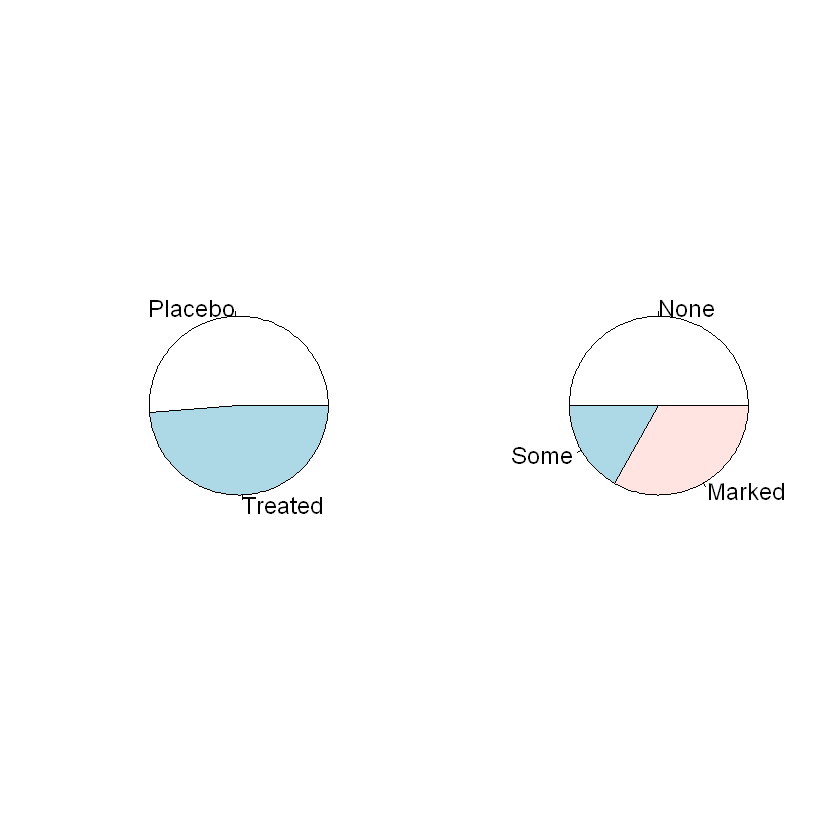

In [8]:
## pie chart:
par(mfrow=c(1,2), cex=1.2, pty="s")
pie(table(Arthritis$Treatment))
pie(table(Arthritis$Improved))

In [9]:
## Use two attributes to create a contingency table:
## (Elements in a contingency table are frequencies of observations)
mytable <- xtabs(~ Treatment + Improved, data = Arthritis)
mytable
addmargins(mytable)

         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

Improved
Treatment None Some Marked Sum
  Placebo 29    7    7     43 
  Treated 13    7   21     41 
  Sum     42   14   28     84

In [15]:
## Express table entries as fractions:
prop.table(mytable)

         Improved
Treatment       None       Some     Marked
  Placebo 0.34523810 0.08333333 0.08333333
  Treated 0.15476190 0.08333333 0.25000000

In [16]:
## clustered bar chart:
par(cex=1.5)
mytable2 <- t(mytable)  ## transpose in order to place row on x-axis
barplot(mytable2, ylab="Frequency", legend=rownames(mytable2), 
        col=c("gray", "lightcyan", "aquamarine"), beside=TRUE)

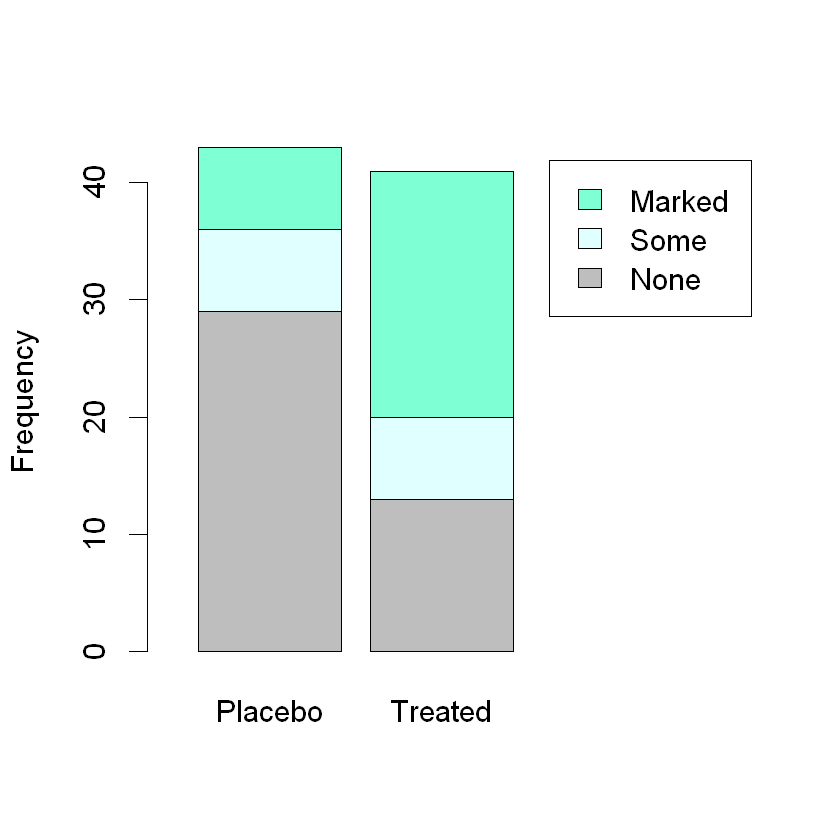

In [11]:
## Stacked bar chart:
par(cex=1.5)
barplot(mytable2, ylab="Frequency", legend=rownames(mytable2), 
        col=c("gray","lightcyan", "aquamarine"), 
        xlim=c(0, ncol(mytable2)+2)) 

In [18]:
## row-wise percentage (normalized by "Treatment"):
mytable3 <- prop.table(mytable, margin=1)
addmargins(mytable3)

Improved
Treatment None      Some      Marked    Sum
  Placebo 0.6744186 0.1627907 0.1627907 1  
  Treated 0.3170732 0.1707317 0.5121951 1  
  Sum     0.9914918 0.3335224 0.6749858 2

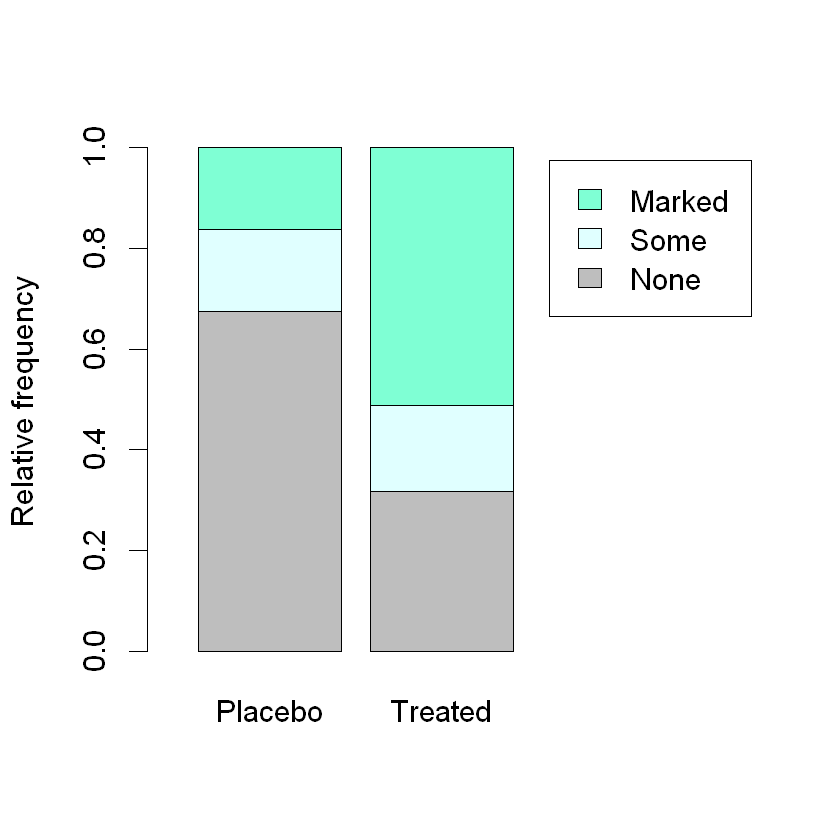

In [19]:
## Stacked bar chart of percentages:
par(cex=1.5)
mytable4 <- t( mytable3 ) 
barplot(mytable4, ylab="Relative frequency", 
        legend=rownames(mytable4), 
        col=c("gray","lightcyan", "aquamarine"), 
        xlim=c(0, ncol(mytable4)+2))

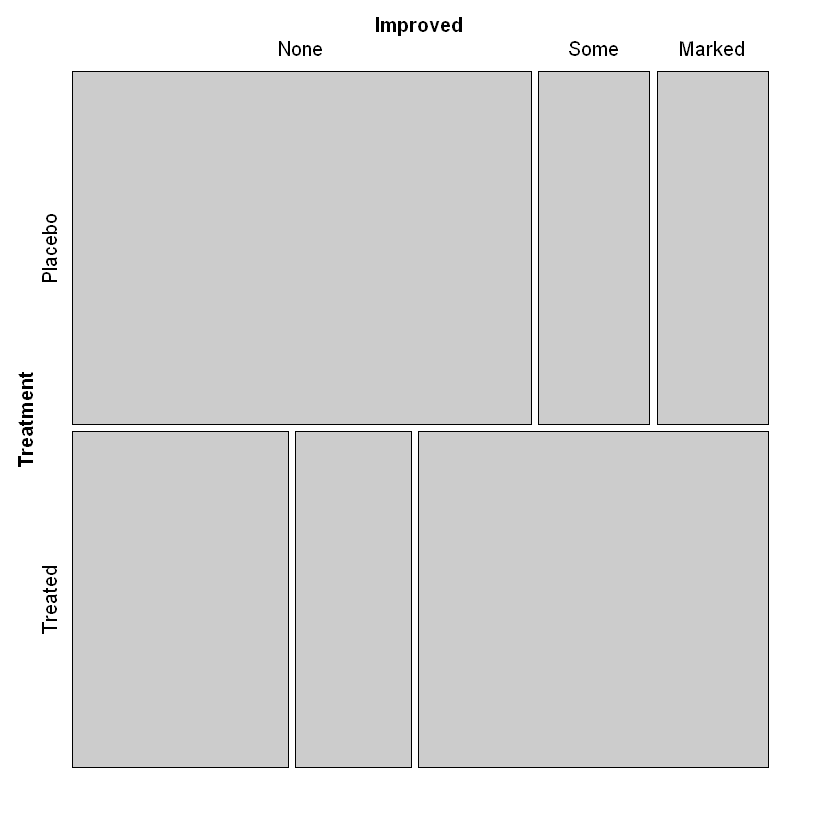

In [174]:
## using mosaic() from vcd:
mosaic(mytable)

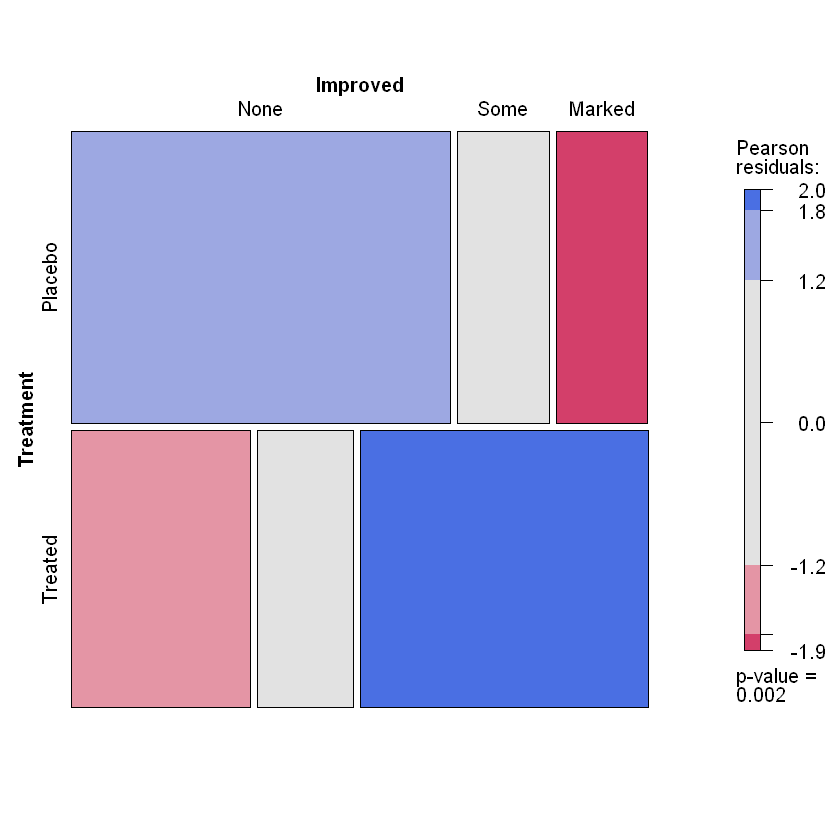

In [173]:
## Add features in mosaic:
mosaic(mytable, shade = TRUE, legend = TRUE,  
       gp = shading_max)

In [20]:
## chi-sq test:
mytest <- chisq.test(mytable)
mytest
qchisq(df=(2-1)*(3-1), p=0.95)  # critical value of sig. level 0.05


	Pearson's Chi-squared test

data:  mytable
X-squared = 13.055, df = 2, p-value = 0.001463


[1] 5.991465

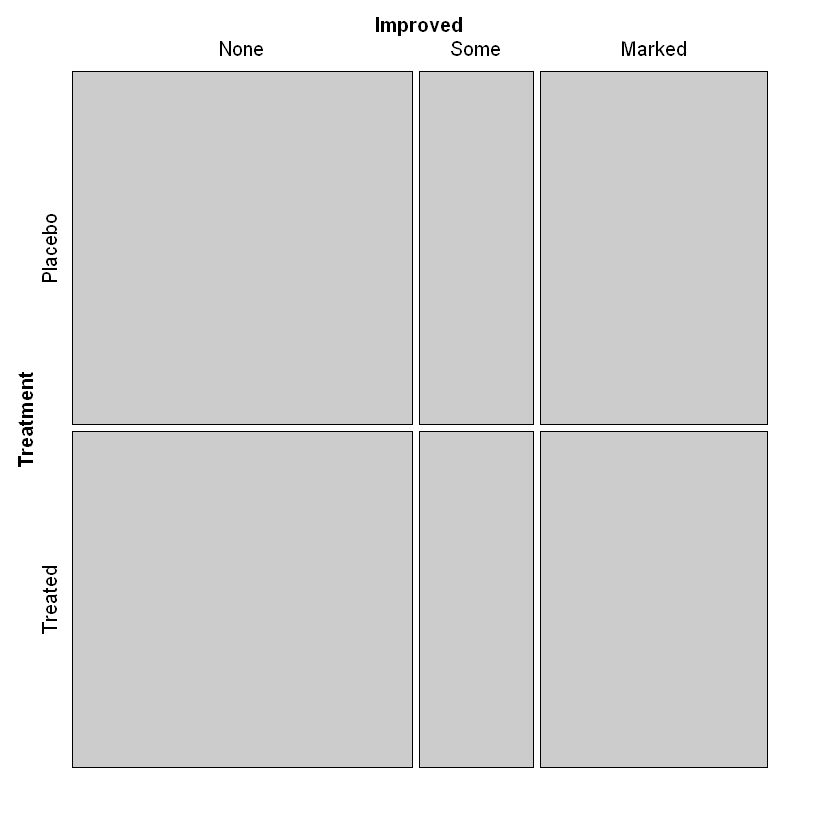

In [21]:
## If null hypothesis is true, the mosaic plot should look like this:
mosaic(mytest$expected)

In [22]:
## effect size, Cramer's V by hand 
## It lies between 0 and 1, closer to 1 means larger association
nr <- nrow(mytable)
nc <- ncol(mytable)
n  <- sum(mytable)
cv1 <- sqrt( mytest$statistic[[1]] / (n*(min(nr, nc) - 1)) ) 
cv1

[1] 0.3942295

In [23]:
## Cramer's V by assocstats in vcd
assocstats(mytable)     

                    X^2 df  P(> X^2)
Likelihood Ratio 13.530  2 0.0011536
Pearson          13.055  2 0.0014626

Phi-Coefficient   : NA 
Contingency Coeff.: 0.367 
Cramer's V        : 0.394 

In [25]:
## by the effectsize package
library(effectsize)
cramers_v(mytest)

Cramers_v CI   CI_low    CI_high
1 0.3942295 0.95 0.1930968 1

In [26]:
## comment:
## As for the interpretation for Cramer's V various rules of thumb exist 
## but one of them is from Cohen (1988) who let's the interpretation 
## depend on the degrees of freedom (not in chisq-test, but min(nr, nc)-1.)
## df*  negligible  small         medium        large
## 1    0 < 0.10    0.10 < 0.30   0.30 < 0.50   0.50 or more
## 2    0 < 0.07    0.07 < 0.21   0.21 < 0.35   0.35 or more
## 3    0 < 0.06    0.06 < 0.17   0.17 < 0.29   0.29 or more
## 4    0 < 0.05    0.05 < 0.15   0.15 < 0.25   0.25 or more
## 5    0 < 0.05    0.05 < 0.13   0.13 < 0.22   0.22 or more

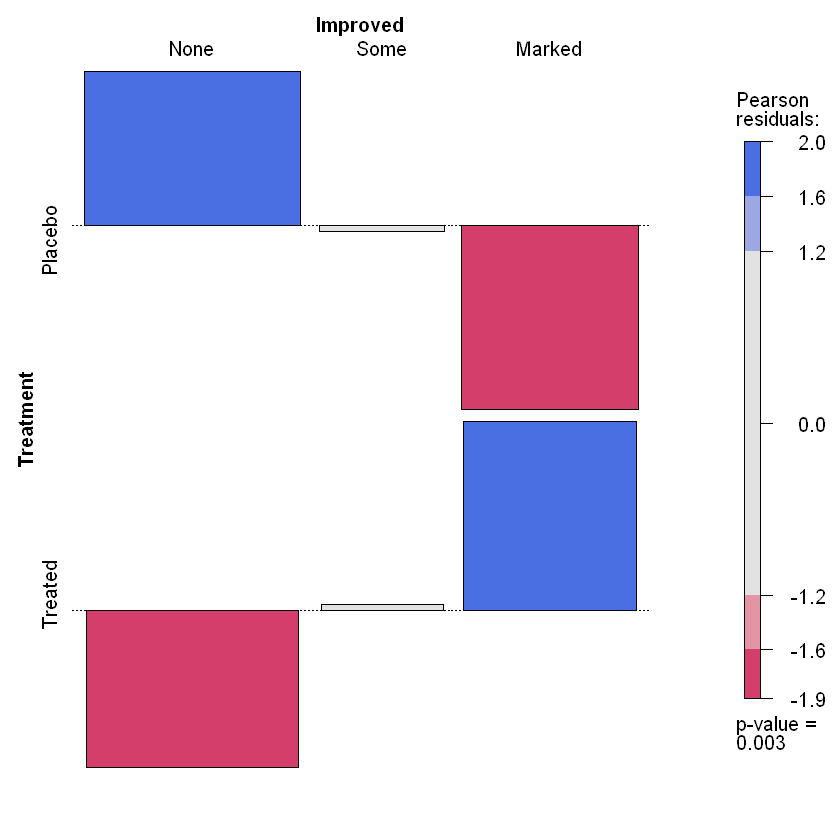

In [27]:
## In the association plot, each cell is shown by a rectangle,
## (signed) height ~ Pearson residual, width = sqrt(expected).
assoc(mytable, shade=TRUE, gp = shading_max)